# Impurity Function 

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
def entropy(p): 
    return -p * np.log2(p) - (1-p) * np.log2((1-p))

In [3]:
#二分类
def gini(p): 
    return 2*p -2*p**2

In [4]:
def error(p): 
    return 1 - np.max([p, 1-p])

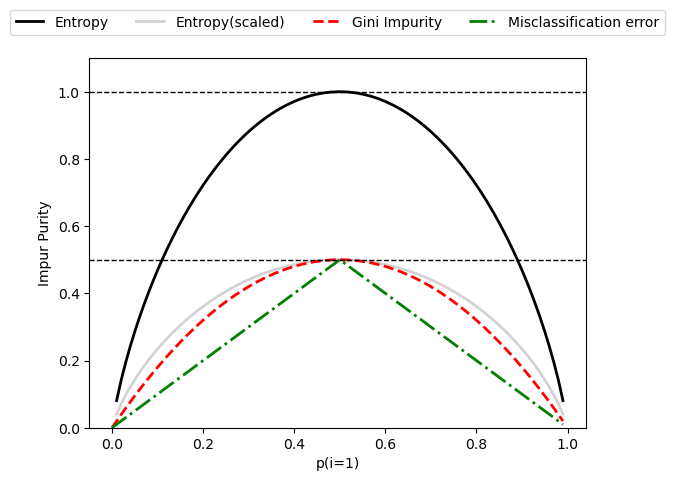

In [5]:
x = np.arange(0, 1, 0.01) 
ent = [entropy(p) if p!=0 else None for p in x] 
sc_ent =[e * 0.5 if e else None for e in ent] 
err = [error(i) for i in x] 


fig,ax = plt.subplots() 
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], 
                        ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification error'],
                        ['-', '-', '--', '-.'], 
                        ['black', 'lightgray', 'red', 'green', 'cyan']):

    line = ax.plot(x, i, label=lab, 
                  linestyle=ls, lw=2, color=c) 

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--') 
ax.axhline(y=1, linewidth=1, color='k', linestyle='--') 
plt.ylim([0, 1.1]) 
plt.xlabel('p(i=1)') 
plt.ylabel('Impur Purity') 
plt.show()

# Decision Tree

In [6]:
from sklearn import datasets 
import numpy as np 

iris = datasets.load_iris() 
X = iris.data[:,[2,3]] 
y = iris.target 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y) 


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# 优化准则是gini 函数； 设置最多的决策层4，防止过拟合
tree_model = DecisionTreeClassifier(criterion='gini', 
                                   max_depth=4, 
                                   random_state=1) 
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 颜色映射
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 画决策边界
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 画样本点
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 标出测试样本
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolors='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\28718\AppData\Local\Temp\ipykernel_88776\159602208.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


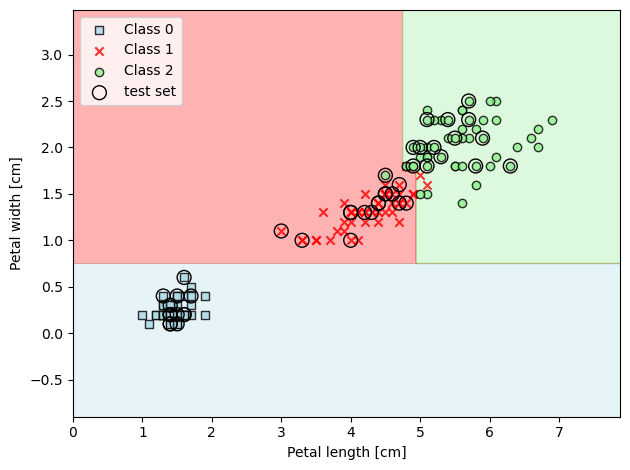

In [10]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

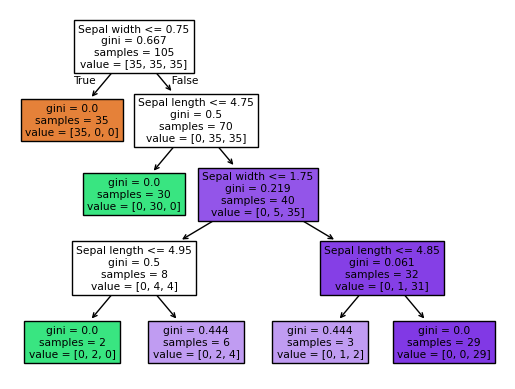

In [11]:
from sklearn import tree 
feature_names = ['Sepal length', 'Sepal width','Petal length', 'Petal width']
tree.plot_tree(
    tree_model,
    feature_names=feature_names, 
    filled=True
) 
plt.show()

# Ensemble of Decision Tree

C:\Users\28718\AppData\Local\Temp\ipykernel_88776\159602208.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


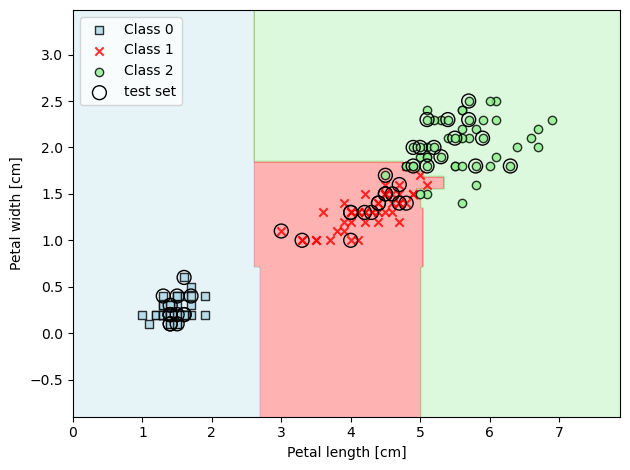

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, 
                                n_jobs = 2, 
                                random_state=1) 
forest.fit(X_train, y_train)
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=forest,test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()